[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/biodatlab/thonburian-whisper/blob/main/thonburian_whisper_notebook.ipynb)


# **Thonburian Whisper**

Automatic Speech Recognition (ASR) model for Thai

<img src="https://raw.githubusercontent.com/biodatlab/thonburian-whisper/main/assets/thonburian-whisper-logo.png" width="400"/>
---



> By Crews from Looloo Technology and Mahidol University




## **Install Dependencies** ⚙

In [1]:
!pip install git+https://github.com/huggingface/transformers
!pip install librosa
!sudo apt install ffmpeg
!pip install torchaudio ipywebrtc notebook
!pip install -q gradio

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-f2gs6hoq
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-f2gs6hoq
  Resolved https://github.com/huggingface/transformers to commit 3ea3ab62d80d91f9bdd16bd3cacd8133fb0d4566
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 24.4 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.47.0.dev0-py3-none-any.whl size=10053105 sha256=3cf5b0fc6b7ea1596cd273922d87fe6b60f9e45b60072f08e30f1be196d13701
  Stored in directory: /tmp/pip-ephem-wheel-cache-h7fv7wkz/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully 

## **Load and Set-up Thonburian Whisper 🤗**


In [2]:
import os
import torch
from transformers import pipeline

MODEL_NAME = "biodatlab/whisper-th-medium-combined"
lang = "th"

device = 0 if torch.cuda.is_available() else "cpu"

pipe = pipeline(
    task="automatic-speech-recognition",
    model=MODEL_NAME,
    chunk_length_s=30,
    device=device,
)

config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/339 [00:00<?, ?B/s]

Device set to use cpu


## **Try it with your own voice** 🎥

In [3]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 37.1 MB/s eta 0:00:00


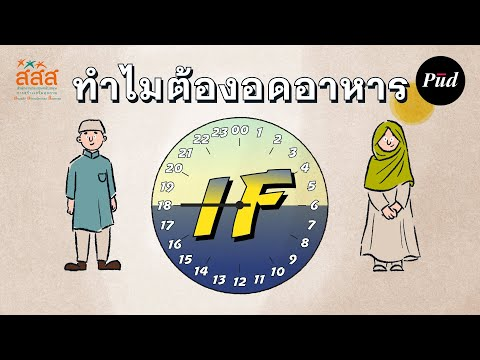

In [4]:
from IPython.display import YouTubeVideo
YOUTUBE_ID = 'hSUFw2jyK9U'
YouTubeVideo(YOUTUBE_ID)

In [5]:
!yt-dlp --extract-audio --audio-quality 0 --audio-format mp3 --output "audio.%(ext)s" https://www.youtube.com/watch?v=hSUFw2jyK9U
# !yt-dlp --extract-audio --audio-quality 0 --audio-format mp3 --output "audio.%(ext)s" https://www.youtube.com/watch?v=hSUFw2jyK9U

[youtube] Extracting URL: https://www.youtube.com/watch?v=hSUFw2jyK9U
[youtube] hSUFw2jyK9U: Downloading webpage
[youtube] hSUFw2jyK9U: Downloading ios player API JSON
[youtube] hSUFw2jyK9U: Downloading mweb player API JSON
[youtube] hSUFw2jyK9U: Downloading player baafab19
[youtube] hSUFw2jyK9U: Downloading m3u8 information
[info] hSUFw2jyK9U: Downloading 1 format(s): 251
[download] Destination: audio.webm
[download] 100% of    5.91MiB in 00:00:00 at 14.44MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio.webm (pass -k to keep)


In [7]:
from transformers import pipeline
import torch
MODEL_NAME = "biodatlab/whisper-th-medium-timestamp"
# MODEL_NAME = "biodatlab/distill-whisper-th-large-v3"
lang = "th"
device = 0 if torch.cuda.is_available() else "cpu"
pipe = pipeline(
    task="automatic-speech-recognition",
    model=MODEL_NAME,
    chunk_length_s=30,
    device=device,
    return_timestamps=True,
)
pipe.model.config.forced_decoder_ids = pipe.tokenizer.get_decoder_prompt_ids(
    language=lang,
    task="transcribe"
)
result = pipe("audio.mp3", return_timestamps=True)
text, timestamps = result["text"], result["chunks"]

Device set to use cpu
/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:509: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


IndexError: index 448 is out of bounds for dimension 0 with size 448